# Plotting

In [2]:
import numpy as np
import os
import json
import datetime
import matplotlib.pyplot as pl
import pandas as pd

%matplotlib inline

In [11]:
#optional
def custom_div_cmap(numcolors=50, name='custom_div_cmap',
                    mincol='green', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    Source: http://pyhogs.github.io/colormap-examples.html
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, maxcol],
                                             N=numcolors)
    return cmap 

custom_map = custom_div_cmap(50, mincol = "#2ca02c", maxcol ="#7c0a02")

# New version

In [3]:
#Data processing

with open("../sortedevents.json","r") as myfile:
    allevents = json.load(myfile)
    
df = pd.DataFrame([list(allevents[i].values()) for i in range(0,len(allevents))],
                 columns = ['team', 'x', 'y', 'type', 'outcome', 'minute', 'second', 'nr']).sort_values(by = ['nr',
                                                                                                              'minute',
                                                                                                             'second'])
df['timestamp'] = df['minute'] * 60 + df['second']
df_array = df[['x','y','nr','timestamp']].values

In [13]:
#Functions (first two: Endre)
def filter_sorted(arr,val,col):
    """arr: 2-D array, with column col sorted ascending
    val: value to filter for
    col: column number of 2-D array that is sorted and we look for vals in.
    returns 2-D array where all elements in column col are val
    """
    return arr[np.searchsorted(arr[:,col],val,side='left'):np.searchsorted(arr[:,col],val,side='right'),:]

def filter_interval_sorted(arr,interval,col):
    """arr: 2-D array, with column col sorted ascending
    interval: array of 2 values, ascending
    col: column number of 2-D array that is sorted.
    returns 2-D array where all elements in column col are at least interval[0] and at most interval[1]
    """
    return arr[np.searchsorted(arr[:,col],interval[0],side='left'):np.searchsorted(arr[:,col],interval[1],side='right'),:]

def get_coordinates(array, n, interval):
    """array: 2 dimensional numpy array, size = 4, ['x','y','n','timestamp']
    n: int, interval: 2-dim numpy array, size = 2
    """
    filtered = filter_interval_sorted(filter_sorted(array, n, 2),
                                      interval,
                                      3)
    return(filtered[:, 0],filtered[:, 1])

def plotCoord(xcoord,ycoord,nbins = 30,colormap = pl.cm.BuGn_r):
    """plot everything
    """
    pl.hist2d(xcoord, ycoord, bins = nbins,cmap = colormap)
    pl.title("Heatmap")
    pl.colorbar()
    pl.show()

In [14]:
def WhereWasTheBall(n,timeinterval = np.array([0,7324])):
    x,y = get_coordinates(df_array, n, timeinterval)
    plotCoord(x,y)

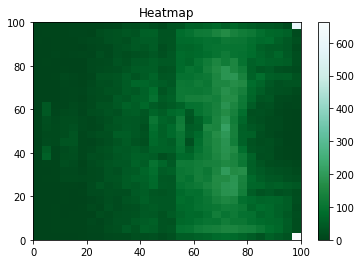

In [9]:
WhereWasTheBall(1)

In [ ]:
%timeit WhereWasTheBall(1)